**NETWORK INTRUSION DETECTION SYSTEM**

importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

loading dataset (read the data)

In [ ]:
df = pd.DataFrame()
df = pd.read_csv('/content/drive/MyDrive/CIC IDS 2017 Dataset/Wednesday-WorkingHours.pcap_ISCX.csv')

**Inspecting the dataset**

intital shape

In [ ]:
shape_i = df.shape
print("Dataset set contains",shape_i[0], "rows &",shape_i[1], "columns. ")


Dataset set contains 445909 rows & 79 columns. 


sampled an item

In [ ]:
df.sample()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
344207,40321,147,2,0,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


dataset exploration

In [ ]:
print("Columns: \n",df.columns)
print("Datatype of each columns: \n",df.dtypes)

Columns: 
 Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length V

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445909 entries, 0 to 445908
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             445909 non-null  int64  
 1    Flow Duration                445909 non-null  int64  
 2    Total Fwd Packets            445909 non-null  int64  
 3    Total Backward Packets       445909 non-null  int64  
 4   Total Length of Fwd Packets   445909 non-null  int64  
 5    Total Length of Bwd Packets  445909 non-null  int64  
 6    Fwd Packet Length Max        445909 non-null  int64  
 7    Fwd Packet Length Min        445909 non-null  int64  
 8    Fwd Packet Length Mean       445909 non-null  float64
 9    Fwd Packet Length Std        445909 non-null  float64
 10  Bwd Packet Length Max         445909 non-null  int64  
 11   Bwd Packet Length Min        445909 non-null  int64  
 12   Bwd Packet Length Mean       445909 non-nul

In [ ]:
print(df.describe().T)

                                count          mean           std  min    25%  \
 Destination Port            445909.0  8.878376e+03  1.952289e+04  0.0   53.0   
 Flow Duration               445909.0  1.077944e+07  2.955629e+07 -4.0  186.0   
 Total Fwd Packets           445909.0  1.180047e+01  8.670724e+02  1.0    2.0   
 Total Backward Packets      445909.0  1.390721e+01  1.172162e+03  0.0    1.0   
Total Length of Fwd Packets  445909.0  5.302105e+02  5.676904e+03  0.0    4.0   
...                               ...           ...           ...  ...    ...   
 Active Min                  445909.0  4.828426e+04  5.649489e+05  0.0    0.0   
Idle Mean                    445909.0  3.294459e+06  1.258776e+07  0.0    0.0   
 Idle Std                    445909.0  1.497105e+05  1.982346e+06  0.0    0.0   
 Idle Max                    445909.0  3.407025e+06  1.293249e+07  0.0    0.0   
 Idle Min                    445909.0  3.145407e+06  1.240892e+07  0.0    0.0   

                           

**Classifying numerical & categorical feautures**

In [ ]:
df.corr()[' Label']

KeyError: ' Label'

**Cleaning the dataset** (Handling Missing values, Duplicates, Irrelevant,  Outliers)

checking missing and duplicates values

<Axes: title={'center': 'Missing Values Heatmap'}>

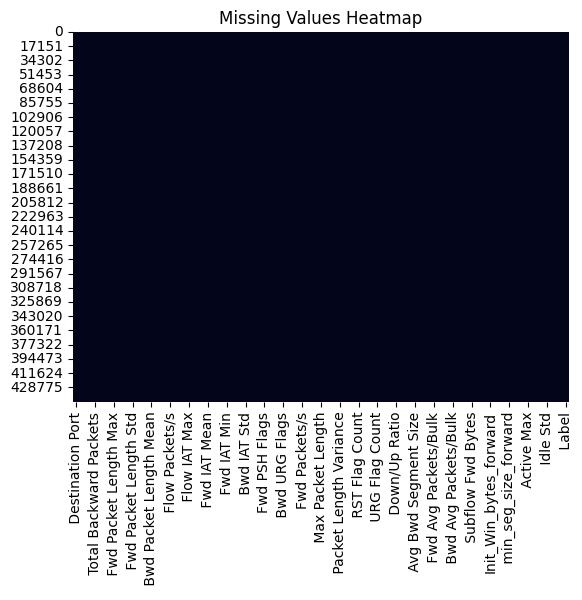

In [ ]:
plt.title('Missing Values Heatmap')
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
null_counts = df.isnull().sum()
print("Number of missing values in each column: ",null_counts)
#df.dropna(inplace=True)

Number of missing values in each column:   Destination Port              0
 Flow Duration                 0
 Total Fwd Packets             0
 Total Backward Packets        0
Total Length of Fwd Packets    0
                              ..
Idle Mean                      0
 Idle Std                      0
 Idle Max                      0
 Idle Min                      0
 Label                         0
Length: 79, dtype: int64


In [ ]:
duplicate_counts = df.duplicated().sum()
print("Number of duplicate rows: ",duplicate_counts)
df.drop_duplicates(inplace=True)

Number of duplicate rows:  24065


In [ ]:
df.drop([df.columns[55]], axis=1, inplace=True)

intermediate shape

In [ ]:
shape_i1 = df.shape
print("Dataset set contains",shape_i1[0], "rows &",shape_i1[1], "columns. ")

Dataset set contains 421844 rows & 78 columns. 


identify irrelevant feature

In [ ]:
# Identify columns with low cardinality
cardinality = df.nunique().sort_values(ascending=False)
#print("Cardinality of each column:\n", cardinality)
low_cardinality_cols = df.columns[df.nunique() <= 20].tolist()
print("Columns with low cardinality:", low_cardinality_cols)


Columns with low cardinality: ['Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', ' min_seg_size_forward', ' Label']


In [ ]:
# Identify columns with low variance
low_variance_cols = df.columns[df.var() < 100].tolist()
print("Columns with low variance:", low_variance_cols)


Columns with low variance: ['Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count', ' Down/Up Ratio', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', ' act_data_pkt_fwd', ' Label']


In [ ]:
# Identify common columns in both lists
common_cols_to_drop = list(set(low_cardinality_cols) & set(low_variance_cols))
print(f"Columns present in both low cardinality and low variance lists: {common_cols_to_drop}")
df.drop(columns=common_cols_to_drop, inplace=True)
print("\nDataset shape after removing irrelevant columns:", df.shape)

Columns present in both low cardinality and low variance lists: [' Bwd Avg Bytes/Bulk', ' RST Flag Count', 'Fwd Avg Bytes/Bulk', 'FIN Flag Count', ' Fwd Avg Bulk Rate', ' Bwd Avg Packets/Bulk', ' Down/Up Ratio', 'Bwd Avg Bulk Rate', ' PSH Flag Count', ' Label', ' Fwd Avg Packets/Bulk', ' Bwd URG Flags', ' Bwd PSH Flags', ' SYN Flag Count', ' ACK Flag Count', ' CWE Flag Count', 'Fwd PSH Flags', ' ECE Flag Count', ' Fwd URG Flags', ' URG Flag Count']

Dataset shape after removing irrelevant columns: (421844, 58)


**encoding**

In [ ]:
le = LabelEncoder()
df[' Label'] = le.fit_transform(df[' Label'])

In [ ]:
label_count = df[' Label'].value_counts()
normal = df[df[' Label'] == 0]
attack = df[df[' Label'] != 0]
print(" ",label_count)
print("Normal: ",len(normal))
print("Attack: ",len(attack))

   Label
0    432074
1      7938
2      5897
Name: count, dtype: int64
Normal:  432074
Attack:  13835


**Visulasion**

types of attack

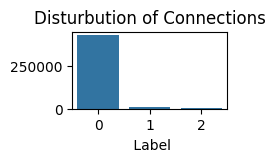

In [ ]:
plt.figure(figsize=(2, 1))
plt.title('Disturbution of Connections')
sns.barplot(x=label_count.index, y=label_count.values)
plt.show()

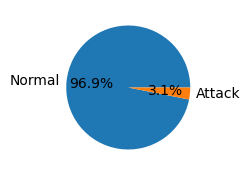

In [ ]:
plt.figure(figsize=(2, 10))
plt.pie([len(normal), len(attack)], labels=['Normal', 'Attack'], autopct='%1.1f%%')
plt.show()

/tmp/ipython-input-896409561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' Flow Duration'])


<Axes: xlabel=' Flow Duration', ylabel='Density'>

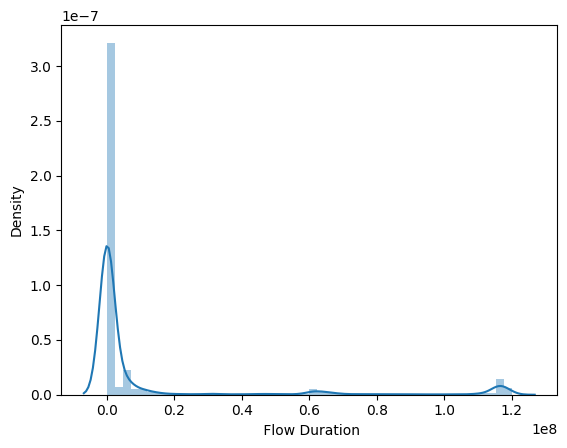

In [ ]:
sns.distplot(df[' Flow Duration'])

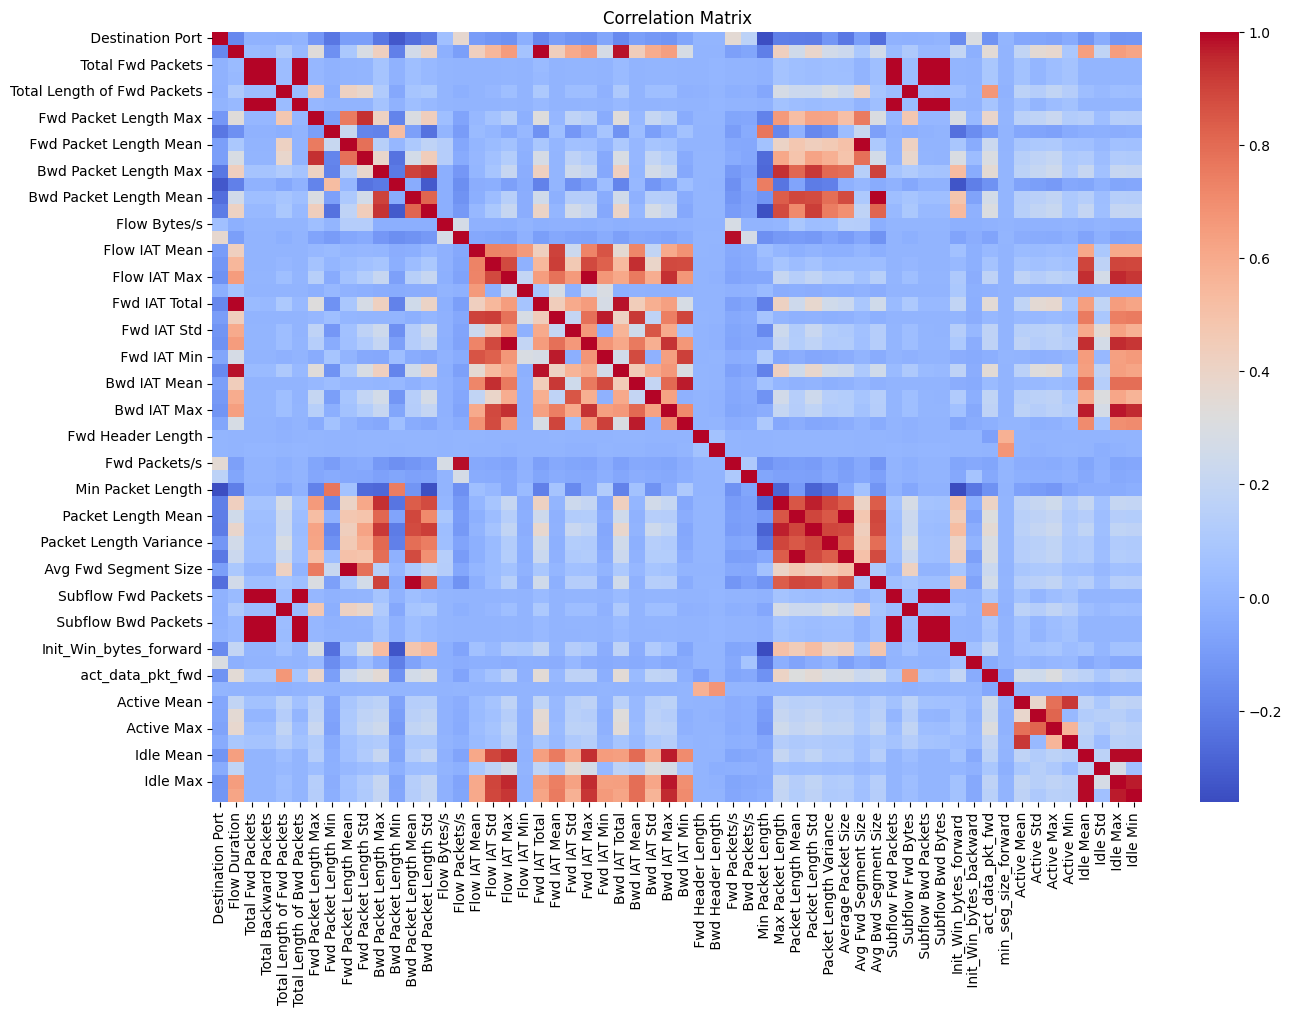

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()